# [Machine Learning] L2_Norm


### Student ID : 20144367, Name : Lee, Donghyun


## 1. Problem

Use L2-Norm to compute the average images for each label(digit) in 'MNIST-train.csv' file. The file contains 60000 28x28 image files represented by arrays consist of 0~255 grey-scale numbers. An example is shown below.


\begin{array}{rr} \hline
columns &[0] &[1] &[2] &[3] &[\dots] &[419] &[\dots] &[28\times28] \\ \hline 
k^{th} row &1 &0 &0 &0 &\dots &114 &\dots &0 \\ \hline
\end{array}

The first element[0] indicates the digit between 0~9, and each values in $[n]$ represents the color of $n^{th}$ pixel of the digit. The example above represents the image for digit 1.

By using the file 'mnist-train.csv' file as input, compute the average of images by L2-Norm and draw the images.


## 2. L2-Norm Definition

> On an n-dimensional Euclidean space $R^n$, the intuitive notion of length of the vector $x = (x_1, x_2, \dots, x_n)$ is captured by the formula
$$\Vert x \Vert_2 = \sqrt{x_{1}^{2} + x_{2}^{2} + \dots + x_{n}^{2}} = \sqrt{x^Tx}$$

## 2.1 Root Mean Square(RMS)

> For $n-vector$ $x = (x_1, x_2, \dots, x_n)$, Root-mean-square value (RMS value) is 
$$rms(x) = \sqrt{\frac{x_{1}^{2} + x_{2}^{2} + \dots + x_{n}^{2}}{n}} = \frac{\Vert x \Vert}{\sqrt{n}}$$

## 3. Computing Average images using L2-Norm

We're going to use L2-Norm as a distance for this problem. For each digit(label), computes the L2-Norm for each pixel. The implementation codes and the results for each digit is like below.

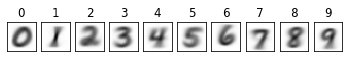

In [10]:
import matplotlib.pyplot as plt
import numpy as np

file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image

num_image	= len(data)
count       	= 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

list_digitCount = np.zeros(10, dtype=int)
list_L2Normed = np.zeros((size_row * size_col,10),dtype=float)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_digitCount[int(label)] += 1
    list_L2Normed[:, int(label)] += im_vector ** 2
    
    list_label[count]       = label
    list_image[:, count]    = im_vector 

    count += 1

list_RMSdDigits = np.zeros((size_row * size_col,10),dtype=float)

# Use RMS for exact result. Devide L2-Normed result by the number of digits so that the result could be [0,1]
for i in range(10) :
    list_RMSdDigits[:,i] = np.sqrt(list_L2Normed[:,i] / list_digitCount[i])
    
f1 = plt.figure(1)

for i in range(10) :
    label = i
    im_vector = list_RMSdDigits[:,i]
    im_matrix = im_vector.reshape(size_row, size_col)
    
    plt.subplot(1,10,i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None', vmin = 0, vmax = 1)

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()